In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
!pip install keras-tuner
!pip install scikeras
import kerastuner as kt
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from kerastuner.tuners import Hyperband
from kerastuner.engine.hyperparameters import HyperParameters
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 3.4 MB/s eta 0:00:00


<ipython-input-5-0ee36a7c3dc1>:10: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [6]:
df= pd.read_csv('/content/drive/MyDrive/CustomerChurn_dataset.csv')

In [7]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5099,6861-OKBCE,Female,0,No,Yes,11,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),20.10,221.35,Yes
201,8544-GOQSH,Female,0,No,No,14,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),80.05,1112.3,No
5100,9940-RHLFB,Female,0,No,No,1,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Electronic check,75.30,75.3,Yes
4055,4676-WLUHT,Male,0,No,No,54,No,No phone service,DSL,Yes,...,No,No,No,Yes,Two year,No,Bank transfer (automatic),46.20,2431.95,No
1692,1696-MZVAU,Male,0,Yes,Yes,39,No,No phone service,DSL,No,...,No,No,No,No,One year,Yes,Credit card (automatic),25.25,947.75,No


In [8]:
df.drop('customerID',axis='columns',inplace= True)

In [9]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [11]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [12]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [13]:
df.iloc[488]['TotalCharges']

' '

In [14]:
new_df=df.copy()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [15]:
new_df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [16]:
new_df['TotalCharges'] = pd.to_numeric(new_df['TotalCharges'], errors='coerce', downcast = 'float')

In [17]:
new_df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [18]:
new_df.TotalCharges.dtypes

dtype('float32')

In [19]:
TotalCharges_null_Array= new_df['TotalCharges'].isnull().sum()
print (f'There are {TotalCharges_null_Array} null values in the TotalCharges column')

There are 11 null values in the TotalCharges column


In [20]:
TotalChargesArray= new_df['TotalCharges'].values.reshape(-1,1)

sc= SimpleImputer(strategy='mean')
new_df['TotalCharges']=sc.fit_transform(TotalChargesArray)

In [21]:
new_df.replace('No internet Service','No',inplace=True)
new_df.replace('No phone service','No',inplace=True)

In [22]:
new_df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [23]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


<function matplotlib.pyplot.legend(*args, **kwargs)>

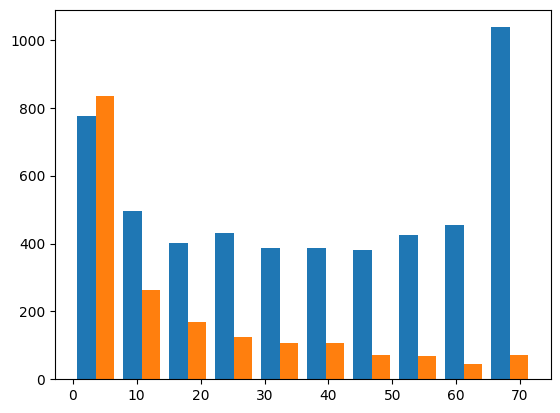

In [24]:
tenure_Nochurn=new_df[new_df.Churn=="No"].tenure
tenure_Yeschurn=new_df[new_df.Churn=="Yes"].tenure
plt.hist([tenure_Nochurn,tenure_Yeschurn],label=['churn=No','churn=Yes'])
plt.legend

In [25]:
for column in df:
  print(f'{column}: {df[column].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalChar

In [26]:
encoded_new_df = new_df.copy()

label_encoder= LabelEncoder()


encoded_new_df['gender'+'_encoded']= label_encoder.fit_transform(encoded_new_df['gender'])
encoded_new_df['Partner'+'_encoded']= label_encoder.fit_transform(encoded_new_df['Partner'])
encoded_new_df['Dependents'+ '_encoded']= label_encoder.fit_transform(encoded_new_df['Dependents'])
encoded_new_df['PhoneService'+'_encoded']= label_encoder.fit_transform(encoded_new_df['PhoneService'])
encoded_new_df['MultipleLines'+'_encoded']= label_encoder.fit_transform(encoded_new_df['MultipleLines'])
encoded_new_df['InternetService'+'_encoded']=label_encoder.fit_transform(encoded_new_df['InternetService'])
encoded_new_df['OnlineSecurity'+'_encoded']=label_encoder.fit_transform(encoded_new_df['OnlineSecurity'])
encoded_new_df['OnlineBackup'+ '_encoded']=label_encoder.fit_transform(encoded_new_df['OnlineBackup'])
encoded_new_df['DeviceProtection'+'_encoded']=label_encoder.fit_transform(encoded_new_df['DeviceProtection'])
encoded_new_df['TechSupport'+'_encoded']= label_encoder.fit_transform(encoded_new_df['TechSupport'])
encoded_new_df['StreamingTV'+'_encoded']=label_encoder.fit_transform(encoded_new_df['StreamingTV'])
encoded_new_df['StreamingMovies'+'_encoded']=label_encoder.fit_transform(encoded_new_df['StreamingMovies'])
encoded_new_df['Contract'+'_encoded']=label_encoder.fit_transform(encoded_new_df['Contract'])
encoded_new_df['PaperlessBilling'+'_encoded']=label_encoder.fit_transform(encoded_new_df['PaperlessBilling'])
encoded_new_df['PaymentMethod'+'_encoded']=label_encoder.fit_transform(encoded_new_df['PaymentMethod'])
encoded_new_df['Churn'+'_encoded']=label_encoder.fit_transform(encoded_new_df['Churn'])

encoded_new_df.drop(columns=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn'],inplace=True)

In [27]:
encoded_new_df.info()
print()
print("All columns are now numeric and are filled")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SeniorCitizen             7043 non-null   int64  
 1   tenure                    7043 non-null   int64  
 2   MonthlyCharges            7043 non-null   float64
 3   TotalCharges              7043 non-null   float32
 4   gender_encoded            7043 non-null   int64  
 5   Partner_encoded           7043 non-null   int64  
 6   Dependents_encoded        7043 non-null   int64  
 7   PhoneService_encoded      7043 non-null   int64  
 8   MultipleLines_encoded     7043 non-null   int64  
 9   InternetService_encoded   7043 non-null   int64  
 10  OnlineSecurity_encoded    7043 non-null   int64  
 11  OnlineBackup_encoded      7043 non-null   int64  
 12  DeviceProtection_encoded  7043 non-null   int64  
 13  TechSupport_encoded       7043 non-null   int64  
 14  Streamin

In [28]:
correlationmatrix= encoded_new_df.corr()
important_features = correlationmatrix['Churn_encoded'].sort_values(ascending=False)
important_features= important_features[~(important_features.index.str.contains('Churn_encoded'))]
important_features= important_features.head(5).index.tolist()

print(f"the important features are ={important_features}")

the important features are =['MonthlyCharges', 'PaperlessBilling_encoded', 'SeniorCitizen', 'PaymentMethod_encoded', 'MultipleLines_encoded']


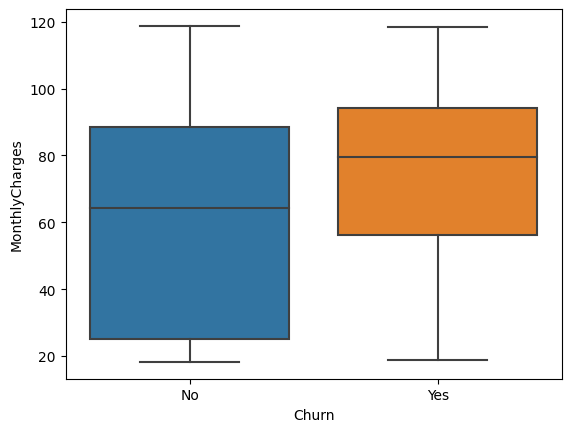

<function matplotlib.pyplot.show(close=None, block=None)>

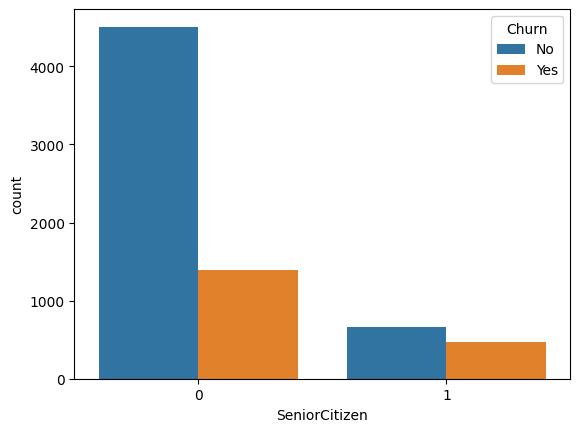

In [29]:
sns.boxplot(x="Churn",y="MonthlyCharges", data= new_df)
plt.show()
print()

sns.countplot(x='SeniorCitizen',hue='Churn',data= new_df)
plt.show

In [30]:
X= encoded_new_df[important_features]
y= encoded_new_df['Churn_encoded']

In [31]:
from sklearn.preprocessing import StandardScaler
StandardScaler= StandardScaler()

X= StandardScaler.fit_transform(X.copy())
X= pd.DataFrame(X, columns= important_features)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

num_neurons = len(X_train.columns)

In [33]:
def create_model(hp):
  input_layer = Input(shape=(num_neurons,))
  hidden_layers= []

  for i in range(hp.Int('num_layers',1,3)):
    units = hp.Int(f'units_{i}',min_value=5, max_value=20, step=5)
    layer=  Dense(units,activation='relu')(hidden_layers[-1] if hidden_layers else input_layer)
    hidden_layers.append(layer)

  output_layer= Dense(1,activation='sigmoid')(hidden_layers[-1] if hidden_layers else input_layers)
  model= Model(inputs=input_layer, outputs=output_layer)


  lr= hp.Choice('learning_rate',values=[1e-2,1e-3,1e-4])

  model.compile(optimizer=Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])

  return model

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
!pip install keras-tuner

In [44]:
from kerastuner.tuners import Hyperband
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
                        activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification
    model.compile(optimizer=Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Now create the tuner object
tuner = Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    directory='my_dir',
    project_name='my_project'
)


In [45]:
tuner.search(
    X_train, y_train,
    epochs=100,
    validation_data=(X_test, y_test),
    callbacks=[EarlyStopping(monitor='val_accuracy', patience=5)]
)


Trial 30 Complete [00h 00m 08s]
val_accuracy: 0.760113537311554

Best val_accuracy So Far: 0.7665010690689087
Total elapsed time: 00h 02m 31s


In [46]:
from kerastuner import HyperParameters

In [77]:
def build_model(hp):
    model = keras.Sequential()

    for i in range(hp.Int('num_layers', 1, 3)):
        # Add layers to the model using hp to define hyperparameters
        model.add(keras.layers.Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
                                     activation='relu'))

    model.add(keras.layers.Dense(1, activation='linear'))  # Example output layer
    model.compile(
        optimizer=legacy.optimizers.legacy.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='mean_squared_error',
        metrics=['accuracy']
    )
    return model

    tuner_search_space = {
        'num_layers': hp.Int('num_layers', 1, 3),
        'learning_rate': hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    }



In [48]:
tuner.search(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='val_accuracy', patience=5)])

In [49]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)

In [50]:
best_model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
177/177 [==============================] - 2s 4ms/step - loss: 0.5354 - accuracy: 0.7329 - val_loss: 0.5037 - val_accuracy: 0.7495
Epoch 2/100
177/177 [==============================] - 0s 3ms/step - loss: 0.5192 - accuracy: 0.7371 - val_loss: 0.5057 - val_accuracy: 0.7452
Epoch 3/100
177/177 [==============================] - 1s 3ms/step - loss: 0.5163 - accuracy: 0.7432 - val_loss: 0.4998 - val_accuracy: 0.7544
Epoch 4/100
177/177 [==============================] - 1s 3ms/step - loss: 0.5165 - accuracy: 0.7448 - val_loss: 0.4999 - val_accuracy: 0.7566
Epoch 5/100
177/177 [==============================] - 1s 3ms/step - loss: 0.5118 - accuracy: 0.7483 - val_loss: 0.4984 - val_accuracy: 0.7693
Epoch 6/100
177/177 [==============================] - 1s 3ms/step - loss: 0.5114 - accuracy: 0.7508 - val_loss: 0.4969 - val_accuracy: 0.7637
Epoch 7/100
177/177 [==============================] - 1s 3ms/step - loss: 0.5099 - accuracy: 0.7492 - val_loss: 0.5021 - val_accuracy: 0.7580

In [51]:
best_model.evaluate(X_test, y_test)

45/45 [==============================] - 0s 2ms/step - loss: 0.5006 - accuracy: 0.7658


[0.5006172060966492, 0.7657913565635681]

In [52]:
accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

45/45 [==============================] - 0s 2ms/step - loss: 0.5006 - accuracy: 0.7658
Test Accuracy: [0.5006172060966492, 0.7657913565635681]


In [53]:
from sklearn.metrics import roc_auc_score

In [54]:
y_probability = best_model.predict(X_test)

45/45 [==============================] - 0s 2ms/step


In [56]:
auc_score = roc_auc_score(y_test, y_probability)
print(f"AUC Score: {auc_score}")

AUC Score: 0.7543022244764872


**Saving the model**

In [70]:
best_model.save('best_model.h5')

**Deploying the model**

In [58]:
import pickle
with open('scaler.pkl', 'wb') as file:
    pickle.dump(StandardScaler, file)

In [60]:
new_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500000,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.500000,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.899902,No
7040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.450012,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.600006,Yes


In [75]:
new_df['MultipleLines'].value_counts()

No     4072
Yes    2971
Name: MultipleLines, dtype: int64

In [74]:
encoded_new_df['MultipleLines_encoded'].value_counts()

0    4072
1    2971
Name: MultipleLines_encoded, dtype: int64

In [72]:
new_df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64